# Загрузка данных

In [50]:
from sklearn import datasets, cross_validation, tree, ensemble, grid_search, learning_curve
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [51]:
info = datasets.load_digits()

In [52]:
X = info.data
y = info.target
print('Размер матрицы признаков: {0},  размер ответов: {1}'.format(X.shape, y.shape))

Размер матрицы признаков: (1797, 64),  размер ответов: (1797,)


## 1. DecisionTreeClassifier + cross_val_score

In [53]:
def write_answer_1(answer):
    with open('bagging_forest_1.txt', 'w') as file:
        file.write(str(answer))

In [54]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
ans1 = cross_validation.cross_val_score(dtc, X, y, cv = 10)

In [56]:
print(ans1.mean())
write_answer_1(ans1.mean())

0.8296371260116755


## 2. BaggingClassifier from sklearn

In [73]:
def write_answer_2(answer):
    with open('bagging_forest_2.txt', 'w') as file:
        file.write(str(answer))

In [74]:
bc = ensemble.BaggingClassifier(n_estimators = 100)
bc.fit(X,y)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [75]:
ans2 = cross_validation.cross_val_score(bc, X, y, cv = 10)

In [76]:
print(ans2.mean())
write_answer_2(ans2.mean())

0.9215120807639972


## 3. BaggingClassifier with $\sqrt{d}$

In [80]:
def write_answer_3(answer):
    with open('bagging_forest_3.txt', 'w') as file:
        file.write(str(answer))

In [81]:
third = ensemble.BaggingClassifier(n_estimators = 100, max_features = int(np.sqrt(X.shape[1])) )
third.fit(X,y)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=8, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [82]:
ans3 = cross_validation.cross_val_score(third, X, y, cv = 10)

In [83]:
print(ans3.mean())
write_answer_3(ans3.mean())

0.9349375251572966


## 4. $\sqrt{d}$ each vertex

In [84]:
def write_answer_4(answer):
    with open('bagging_forest_4.txt', 'w') as file:
        file.write(str(answer))

In [85]:
fourth = ensemble.BaggingClassifier(n_estimators = 100, 
        base_estimator = tree.DecisionTreeClassifier(max_features = 
                                                int(np.sqrt(X.shape[1]))))
fourth.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [86]:
ans4 = cross_validation.cross_val_score(fourth, X, y, cv = 10)

In [87]:
print(ans4.mean())
write_answer_4(ans4.mean())

0.9522463678280652


## 5. RandomForest vs DecisionTree

In [88]:
rand = ensemble.RandomForestClassifier()
rand.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
rand_result = cross_validation.cross_val_score(rand, X, y, cv = 10)
print(rand_result)
print(rand_result.mean())

[0.88108108 0.94535519 0.91712707 0.92777778 0.9273743  0.97765363
 0.93296089 0.93820225 0.87570621 0.91477273]
0.9238011137907538


In [91]:
parameters=  {
    'n_estimators' : [5, 10, 15, 30, 50, 100, 150, 200, 300, 500],
    'max_features' : [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60],
    'max_depth' : [2, 4, 6, 8, 10, 20, 30, 50, 100],
}

### estimators - деревья

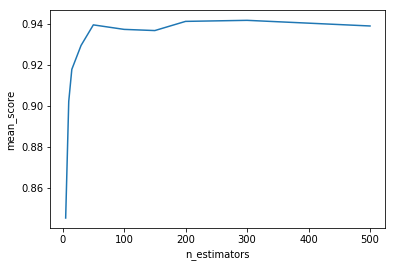

In [94]:
score = []
for i in parameters['n_estimators']:
    scores = cross_validation.cross_val_score(ensemble.RandomForestClassifier(n_estimators=i), X, y, cv=5)
    score.append(scores.mean())
    
plt.plot(parameters['n_estimators'], score)
plt.xlabel('n_estimators')
plt.ylabel('mean_score')
plt.show()

### max_features - признаки

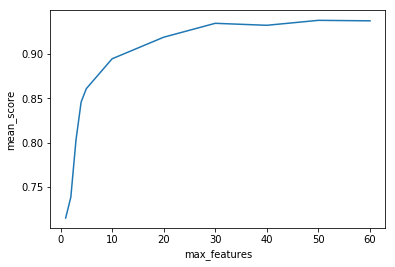

In [95]:
score = []
for i in parameters['max_features']:
    scores = cross_validation.cross_val_score(ensemble.RandomForestClassifier(n_estimators=i), X, y, cv=5)
    score.append(scores.mean())
    
plt.plot(parameters['max_features'], score)
plt.xlabel('max_features')
plt.ylabel('mean_score')
plt.show()

### max_depth - глубина

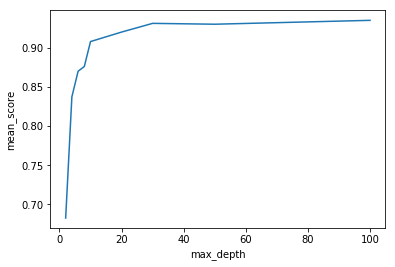

In [96]:
score = []
for i in parameters['max_depth']:
    scores = cross_validation.cross_val_score(ensemble.RandomForestClassifier(n_estimators=i), X, y, cv=5)
    score.append(scores.mean())
    
plt.plot(parameters['max_depth'], score)
plt.xlabel('max_depth')
plt.ylabel('mean_score')
plt.show()